In [ ]:
import seaborn as sns # De graficación
import matplotlib.pyplot as plt # De graficación
import pandas as pd # Dataframes
import numpy as np
from scipy.stats import skew, kurtosis
import plotly.express as px #Librería de graficación de plotly para python



In [ ]:
df = pd.read_csv('cumplimiento_precio.csv', index_col=0, sep=';', encoding='latin-1')
df.head()

,Ola,Region,Gerencia,Canal,ID_Cliente,Cumplimiento,Adherencia_Mensual
Cons,,,,,,,
1,diciembre,CO Andes,CO GC Suroeste,IH SF Minimercado,11748533,0.0,0.0
2,diciembre,CO Centro,CO GC Tocancipa,IH SF Minimercado,18495688,40.0,40.0
3,diciembre,CO Centro,CO GC Tocancipa,IH SF Licorera,19457417,75.0,75.0
4,diciembre,CO Andes,CO GC B/manga Mtrpltna,IH SF Tienda Barrio,14966735,28.6,33.3
5,diciembre,CO Sur,CO GC Neiva,IH SF Licorera,19949947,33.3,33.3


In [ ]:
df.dtypes

Ola                    object
Region                 object
Gerencia               object
Canal                  object
ID_Cliente              int64
Cumplimiento          float64
Adherencia_Mensual    float64
dtype: object

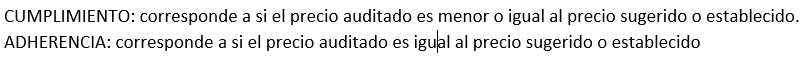

In [ ]:
df['Cumplimiento'] = df['Cumplimiento'].astype(float) 
df['Adherencia_Mensual'] = df['Adherencia_Mensual'].astype(float) 


In [ ]:
df.dtypes

Ola                    object
Gerencia               object
Canal                  object
ID_Cliente              int64
Cumplimiento          float64
Adherencia_Mensual    float64
dtype: object

# **BLOXPLOT**

In [ ]:
df[('Cumplimiento')].mean()



54.68137837837838

In [ ]:
print(df[('Region')].unique())

['CO Andes' 'CO Centro' 'CO Sur' 'CO Norte']


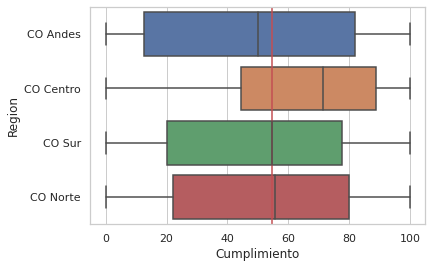

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Cumplimiento'],y=df['Region'])

plt.axvline(df['Cumplimiento'].mean(), c='r') # la linea roja refleja el promedio del cumplimiento

Utilice un boxplot para analizar la distribución de la variable númerica cumplimiento de precio, no identifique valores atipicos y para la region Andes la mayoria de los datos estan concentrados por debajo del valor promedio, para Centro la mayoria de los datos estan concentrados por encima de promedio, para Sur la mayoria de los datos estan concentrados por debajo del promedio y para Norte la mayoria de los datos estan concentrados por debajo del promedio.

Dentro del rango total de los datos, la distribución que tiende hacia un cumplimiento menor. Los datos en general están poco dispersos.





# **HISTOGRAMA**

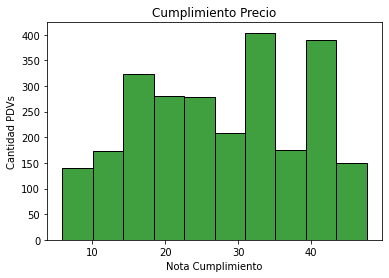

In [ ]:
#filtro = df[(df['Cumplimiento']!= 100) & (df['Cumplimiento'] != 0)]  #quitando valores extremos
 
filtro = df[ (df['Cumplimiento'] != 0)  & (df['Cumplimiento'] <50)]

ax =sns.histplot(filtro['Cumplimiento'], kde=False, bins=10,color="Green")
ax.set(title='Cumplimiento Precio', xlabel='Nota Cumplimiento', ylabel='Cantidad PDVs');


#analisis por separado cumplimiento menor a 50 y cumplimiento mayor a 50 quitando los valores extremos


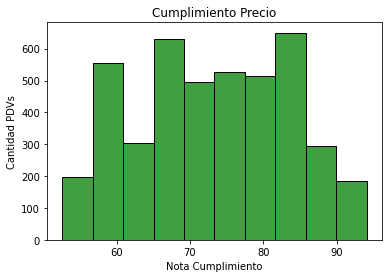

In [ ]:
filtro = df[ (df['Cumplimiento'] >50) & (df['Cumplimiento']!= 100)]

ax =sns.histplot(filtro['Cumplimiento'], kde=False, bins=10,color="Green")
ax.set(title='Cumplimiento Precio', xlabel='Nota Cumplimiento', ylabel='Cantidad PDVs');


In [ ]:
datos = filtro['Cumplimiento']
print(f'Curtosis: {kurtosis(datos)}')
print(f'Asimetría: {skew(datos)}')

Curtosis: -0.9933142992632042
Asimetría: -0.3782316101222332


En el eje y se observa la frecuencia asociada a la cantidad de pdvs frente a la distribucion del cumplimiento. Se visualizan más concentraciones de valores en los datos, tendria una distribución multimodal.
Asimetria: La asimetría que se visualiza nos da una medida de la falta de simetría en la distribución. 
Curtosis: en esta medida de la dispersión de los datos,la curtosis muestra que no está achatada la distribución.

# **Gráfica de barras**

In [ ]:
counts = df['Canal'].value_counts()
counts


IH SF Tienda Barrio     6123
OOH DL Tienda Social    3025
IH SF Licorera          1488
IH SF Minimercado        464
Name: Canal, dtype: int64

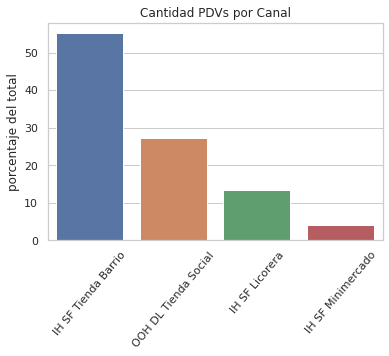

In [ ]:
as_percentages = counts * 100 / counts.sum()

ax = sns.barplot(x=as_percentages.index,y=as_percentages)
ax.set_title('Cantidad PDVs por Canal')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);


# **Graficando con múltiples axis**

In [ ]:
crosstab = pd.crosstab(df['Region'], df['Canal'])

crosstab


#crosstab = pd.crosstab(df['Adherencia_Mensual'], [df['Ola'],df['Region']],margins=True, margins_name='Total')


Canal,IH SF Licorera,IH SF Minimercado,IH SF Tienda Barrio,OOH DL Tienda Social
Region,,,,
CO Andes,279,142,1422,576
CO Centro,288,169,1402,1586
CO Norte,486,57,1655,318
CO Sur,435,96,1644,545


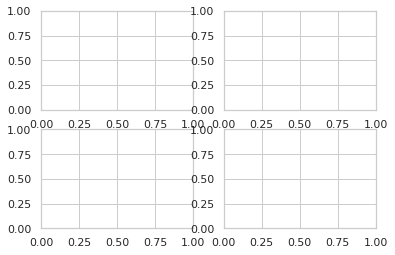

In [ ]:
fig, axes = plt.subplots(2, 2)

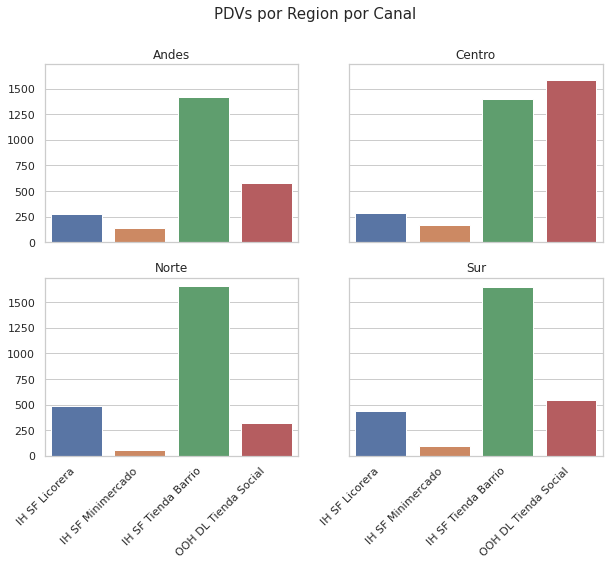

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc['CO Andes'], ax=axes[0, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc['CO Centro'], ax=axes[0, 1])
sns.barplot(x=crosstab.columns, y=crosstab.loc['CO Norte'], ax=axes[1, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc['CO Sur'], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Andes')
axes[0, 1].set(xlabel='', ylabel='', title='Centro')
axes[1, 0].set(xlabel='', ylabel='', title='Norte')
axes[1, 1].set(xlabel='', ylabel='', title='Sur')


fig.suptitle('PDVs por Region por Canal', fontsize=15);
fig.autofmt_xdate(rotation=45)

Permite comparar las gráficas de las regiones, aprovechando que se cuenta con el mismo eje.


# **Mapas de Calor**

In [ ]:
df = pd.read_csv('cumplimiento_detalle1.csv', index_col=0, sep=';', encoding='latin-1')


df_filtered = df.drop(['Cumplimiento', 'EsCompetencia','PDV'], axis=1)
df.head()

,Ola,PDV,Region,Gerencia,Canal,Marca,Cumplimiento,Precio_Auditado,Precio_Sugerido,EsCompetencia,Universo,Muestra,RangoMin,RangoMax
ï»¿CONS,,,,,,,,,,,,,,
1.0,diciembre,1231591.0,CO Andes,CO GC Suroeste,IH SF Minimercado,Aguila,0.0,4800.0,4000.0,0.0,1805.0,47.0,2956.0,6500.0
2.0,diciembre,1928069.0,CO Andes,CO GC Suroeste,IH SF Minimercado,Pilsen,0.0,2550.0,2400.0,0.0,1805.0,47.0,1500.0,4500.0
3.0,diciembre,1597814.0,CO Andes,CO GC Suroeste,IH SF Minimercado,Poker,0.0,4800.0,3500.0,0.0,1805.0,47.0,2956.0,6500.0
4.0,diciembre,1020994.0,CO Centro,CO GC Tocancipa,IH SF Minimercado,Aguila,100.0,2200.0,2200.0,0.0,1531.0,41.0,1500.0,3600.0
5.0,diciembre,1031050.0,CO Centro,CO GC Tocancipa,IH SF Minimercado,Aguila Light,100.0,2200.0,2200.0,0.0,1531.0,41.0,1500.0,3600.0


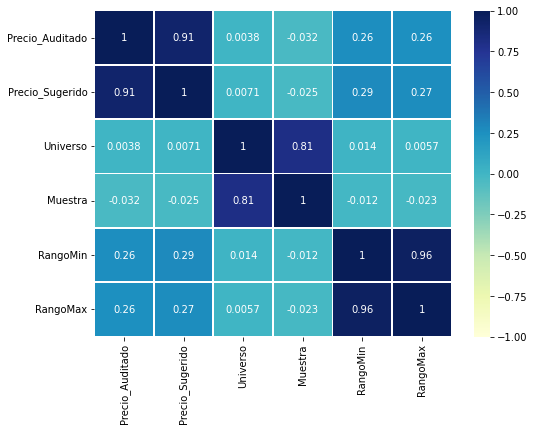

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.8)


Se evidencia relación entre las variables precio_auditado vs precio_sugerido, los rangos min y max

# **Intervalos de confianza**

In [ ]:
auditado = df['Precio_Auditado']

means = []

for i in range(2_000):
    sample = auditado.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {auditado.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 2802.0 < 3062.027324240704 < 3356.0499999999997


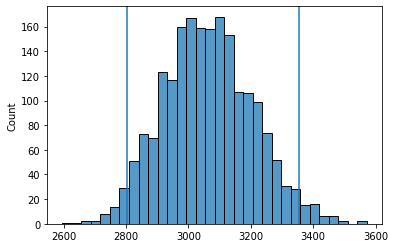

In [ ]:
sns.histplot(serie_means, kde=False)
plt.axvline(limite_inferior)

plt.axvline(limite_superior);

El 95% de nuestras medias de los datos simulados se encuentra entre 2800 y 3350 (precios auditados se encuentran en ese rango)

# **TREEMAPS**

In [ ]:
#Contar los PDVs con cumplimiento
df1=df.loc[(df['Cumplimiento']>0)]
df_grouped = df1.groupby(['Region','Marca'], as_index=False)[['PDV']].count()
filtro = df_grouped.groupby(['Region','Marca'])[['Region','Marca','PDV']].max()

In [ ]:

fig = px.treemap(filtro, path=[px.Constant('Cantidad PDVs con Cumplimiento Precio'),'Region','Marca'], values='PDV')
#fig.data[0].textinfo='label +value'
fig.show()

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))



In [ ]:
#df_grouped = filtro.groupby(['Region','Marca','Canal'])[['Region','Marca','Cumplimiento']].max()
#fig = px.treemap(df_grouped, path=['Region','Marca'], values='Cumplimiento')
#fig.show()

# **BARRAS** **APILADAS**

In [ ]:
df_grouped = df1.groupby(['Region','Marca'], as_index=False)[['Marca']].max()


In [ ]:
value_counts_all = df_grouped['Marca'].value_counts()
value_counts_all

Aguila             4
Aguila Light       4
Andina             4
Budweiser          4
CosteÃ±a Bacana    4
Heineken           4
Poker              4
Becks              3
Club Colombia      2
Pilsen             1
Andina Light       1
Miller Lite        1
Nativa             1
Name: Marca, dtype: int64

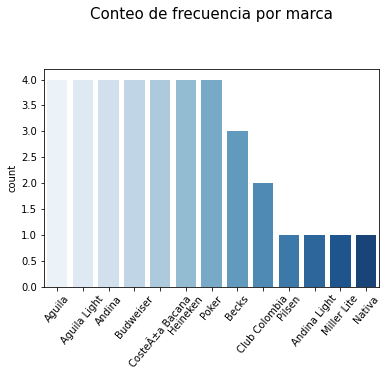

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x= value_counts_all.index, y= value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia por marca', fontsize=15, pad=50);
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);